## Scott Breitbach
### DSC530: Final Project
### 14-November-2020

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd
import thinkstats2
import matplotlib
# import matplotlib.pyplot as plt
import thinkplot

In [2]:
# Read data file to dataframe
gss = r'GSS.xlsx'
df = pd.read_excel(gss)

# Fix weird spacing of year column
df = df.rename(columns={'Gss year for this respondent                       ':'Gss year for this respondent'})

In [3]:
origColumns = df.columns.tolist()
origColumns

['Gss year for this respondent',
 'Respondents income (86)',
 'Respondents income',
 'Total family income',
 'Number of persons in household',
 'How many grandparents born outside u.s.',
 'Age of respondent',
 'Travel time to work',
 'Number of hours worked last week',
 'Respondent id number',
 'Rs occupational prestige score (2010)']

In [4]:
# Rename column headers
# df.rename(columns={'$a':'a', '$b':'b', '$c':'c', '$d':'d', '$e':'e'})
df = df.rename(columns={'Gss year for this respondent':'year',
 'Respondents income (86)':'rincome86',
 'Respondents income':'rincome',
 'Total family income':'income',
 'Number of persons in household':'hompop',
 'How many grandparents born outside u.s.':'granborn',
 'Age of respondent':'age',
 'Travel time to work':'commute',
 'Number of hours worked last week':'hrs1',
 'Respondent id number':'id',
 'Rs occupational prestige score (2010)':'prestg10'})

In [5]:
newColumns = df.columns.tolist()
newColumns

['year',
 'rincome86',
 'rincome',
 'income',
 'hompop',
 'granborn',
 'age',
 'commute',
 'hrs1',
 'id',
 'prestg10']

In [6]:
def CleanColumn(df, columnName):
    na_vals = ["Don't know", "No answer", "Not applicable", "Refused"]
    df[columnName].replace(na_vals, np.nan, inplace = True)
    return df

def CleanData(df):
    for item in newColumns:
        df = CleanColumn(df, item)
    
    # Create unique user IDs for each row:
    df['uniqueID'] = df['year'].map(str) + '-' + df['id'].map(str)
    
    # Replace age of '89 or older' with 89
    df['age'] = df['age'].replace(['89 or older'], 89)

    # Replace grandparents born 'All in u.s' with 0 (born outside U.S.)
    df['granborn'] = df['granborn'].replace(['All in u.s'], 0)

    # Replace travel time of '97+ minutes' with 97
    df['commute'] = df['commute'].replace(['97+ minutes'], 97)
    
    return df

In [7]:
df = CleanData(df)

In [8]:
display(df.dtypes)

year           int64
rincome86     object
rincome       object
income        object
hompop       float64
granborn     float64
age          float64
commute      float64
hrs1         float64
id             int64
prestg10       int64
uniqueID      object
dtype: object

In [9]:
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5


In [10]:
def FixIncVals(column):
    # Replace income ranges with average values in new column
    column = column.replace(['Lt $1000'], 500)
    column = column.replace(['$1000 to 2999'], 2000)
    column = column.replace(['$3000 to 3999'], 3500)
    column = column.replace(['$4000 to 4999'], 4500)
    column = column.replace(['$5000 to 5999'], 5500)
    column = column.replace(['$6000 to 6999'], 6500)
    column = column.replace(['$7000 to 7999'], 7500)
    column = column.replace(['$8000 to 9999'], 9000)
    column = column.replace(['$10000 - 14999'], 12500)
    column = column.replace(['$15000 - 19999'], 17500)
    column = column.replace(['$20000 - 24999'], 22500)
    column = column.replace(['$25000 or more'], 25000)
    return column

In [11]:
# Create new columns with usabale values:
df['rincome2'] = FixIncVals(df['rincome'])
df['income2'] = FixIncVals(df['income'])

In [12]:
def FixIncVals86(column):
    # Replace income ranges with average values in new column
    column = column.replace(['Lt $1000'], 500)
    column = column.replace(['$1000-2999'], 2000)
    column = column.replace(['$3000-3999'], 3500)
    column = column.replace(['$4000-4999'], 4500)
    column = column.replace(['$5000-5999'], 5500)
    column = column.replace(['$6000-6999'], 6500)
    column = column.replace(['$7000-7999'], 7500)
    column = column.replace(['$8000-9999'], 9000)
    column = column.replace(['$10000-12499'], 11250)
    column = column.replace(['$12500-14999'], 13750)
    column = column.replace(['$15000-17499'], 16250)
    column = column.replace(['$17500-19999'], 18750)
    column = column.replace(['$20000-22499'], 21250)
    column = column.replace(['$22500-24999'], 23750)
    column = column.replace(['$25000-29999'], 27500)
    column = column.replace(['$30000-34999'], 32500)
    column = column.replace(['$35000-39999'], 37500)
    column = column.replace(['$40000-49999'], 45000)
    column = column.replace(['$50000-59999'], 55000)
    column = column.replace(['$60000+'], 60000)

    return column

In [13]:
df['rincome86_2'] = FixIncVals86(df['rincome86'])

In [14]:
df.rincome86.unique()

array([nan, '$20000-22499', '$6000-6999', '$8000-9999', '$4000-4999',
       '$12500-14999', '$25000-29999', '$5000-5999', '$10000-12499',
       '$22500-24999', '$7000-7999', '$15000-17499', '$40000-49999',
       '$30000-34999', '$50000-59999', '$17500-19999', '$1000-2999',
       '$3000-3999', '$35000-39999', '$60000+', 'Lt $1000'], dtype=object)

In [79]:
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0,NaN,5000.0,$7000 to 7999
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0,NaN,5000.0,$8000 to 9999
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN,NaN,NaN,NaN
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0,NaN,NaN,NaN
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN,NaN,5000.0,$7000 to 7999


In [16]:
# df['rincome2'].astype(float)

## Display unique values in column
df.rincome2.unique()
# df.income2.unique()


array([ 7500.,  9000.,    nan, 22500., 12500., 17500.,  4500.,   500.,
        5500., 25000.,  2000.,  3500.,  6500.])

In [17]:
def IncomeBuckets(column):
    # Replace income ranges with equally spaced buckets, truncated down, by 5000s
    column = column.replace(['Lt $1000'], 0)
    column = column.replace(['$1000 to 2999'], 0)
    column = column.replace(['$3000 to 3999'], 0)
    column = column.replace(['$4000 to 4999'], 0)
    column = column.replace(['$5000 to 5999'], 5000)
    column = column.replace(['$6000 to 6999'], 5000)
    column = column.replace(['$7000 to 7999'], 5000)
    column = column.replace(['$8000 to 9999'], 5000)
    column = column.replace(['$10000 - 14999'], 10000)
    column = column.replace(['$15000 - 19999'], 15000)
    column = column.replace(['$20000 - 24999'], 20000)
    column = column.replace(['$25000 or more'], 25000)
    
    return column

In [18]:
df['rincome2b'] = IncomeBuckets(df['rincome'])

In [80]:
def IncomeBuckets86(column):
    # Replace income ranges with equally spaced buckets, truncated down, by 10000s
    column = column.replace(['Lt $1000'], 0)
    column = column.replace(['$1000-2999'], 0)
    column = column.replace(['$3000-3999'], 0)
    column = column.replace(['$4000-4999'], 0)
    column = column.replace(['$5000-5999'], 0)
    column = column.replace(['$6000-6999'], 0)
    column = column.replace(['$7000-7999'], 0)
    column = column.replace(['$8000-9999'], 0)
    column = column.replace(['$10000-12499'], 10000)
    column = column.replace(['$12500-14999'], 10000)
    column = column.replace(['$15000-17499'], 10000)
    column = column.replace(['$17500-19999'], 10000)
    column = column.replace(['$20000-22499'], 20000)
    column = column.replace(['$22500-24999'], 20000)
    column = column.replace(['$25000-29999'], 20000)
    column = column.replace(['$30000-34999'], 30000)
    column = column.replace(['$35000-39999'], 30000)
    column = column.replace(['$40000-49999'], 40000)
    column = column.replace(['$50000-59999'], 50000)
    column = column.replace(['$60000+'], 60000)
    
    return column

In [81]:
df['rincome86_2b'] = IncomeBuckets86(df['rincome86'])

In [14]:
# # Clean rows with non-useful strings, like 'Not applicable':
# def CleanColumn(df, columnName):
#     na_vals = ["Don't know", "No answer", "Not applicable", "Refused"]
#     df[columnName].replace(na_vals, np.nan, inplace = True)
#     return df

# ## REMOVE THIS
# # columnList = ['Age of respondent', 'Respondents income', 'Total family income', 'Number of persons in household', 
# #              'How many grandparents born outside u.s.', 'Number of hours worked last week']

# for item in newColumns:
#     df = CleanColumn(df, item)
    
# # df = CleanData(df, columnList)

In [15]:
# # Convert floats to integers
# floatToInt = ['How many grandparents born outside u.s.', 'Age of respondent', 'Rs occupational prestige score (2010)']

# def MakeIntegers(df, columnName):
# #     df[columnName] = df[columnName].astype(int)
#     df[columnName] = df[columnName].apply(np.int64)  # Need to remove NaNs
    
# for item in floatToInt:
#     MakeIntegers(df, item)

# df['How many grandparents born outside u.s.'].astype(int)

### Columns with NaN cannot be integers ###

In [16]:
# # Clean rows with non-useful strings, like 'Not applicable':
# def CleanColumn(df, columnName):
#     df = df[df[columnName] != "Don't know"]
#     df = df[df[columnName] != "No answer"]
#     df = df[df[columnName] != "Not applicable"]
#     df = df[df[columnName] != "Refused"]
#     return df

# columnList = ['Age of respondent', 'Respondents income', 'Total family income', 'Number of persons in household', 
#              'How many grandparents born outside u.s.', 'Number of hours worked last week']

# for item in columnList:
#     df = CleanColumn(df, item)

In [17]:
# ## Miscellaneous fixes to make data useable:

# # Create unique user IDs for each row:
# df['uniqueID'] = df['year'].map(str) + '-' + df['id'].map(str)

# # Replace age of '89 or older' with 89
# df['age'] = df['age'].replace(['89 or older'], 89)

# # Replace grandparents born 'All in u.s' with 0 (born outside U.S.)
# df['granborn'] = df['granborn'].replace(['All in u.s'], 0)

# # Replace travel time of '97+ minutes' with 97
# df['commute'] = df['commute'].replace(['97+ minutes'], 97)

##### Need to remove NaNs? :(
Apparently you have to use floats if the column contains NaNs, because Pandas

In [18]:
# # Convert floats to integers
# floatToInt = ['How many grandparents born outside u.s.', 'Age of respondent', 'Rs occupational prestige score (2010)']

# def MakeIntegers(df, columnName):
# #     df[columnName] = df[columnName].astype(int)
#     df[columnName] = df[columnName].apply(np.int64)  # Need to remove NaNs
    
# for item in floatToInt:
#     MakeIntegers(df, item)

##### DONE! 
NOTE: Need to replace income ranges with values; new variable / column?

In [21]:
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0,NaN,5000.0,$7000 to 7999
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0,NaN,5000.0,$8000 to 9999
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN,NaN,NaN,NaN
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0,NaN,NaN,NaN
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN,NaN,5000.0,$7000 to 7999


A minimum of 5 variables in your dataset used during your analysis (for help with  selecting, the author made his selection on page 6 of your book). Consider what you  think could have an impact on your question – remember this is never perfect, so don’t  be worried if you miss one (Chapter 1). 
#### Describe what the 5 variables mean in the dataset (Chapter 1). 
#### Histograms of each of 5 variables
Include a histogram of each of the 5 variables – in your summary and analysis, identify  any outliers and explain the reasoning for them being outliers and how you believe they  should be handled (Chapter 2).  

In [ ]:
# preg = nsfg.ReadFemPreg()
# live = preg[preg.outcome == 1]

## Histograms

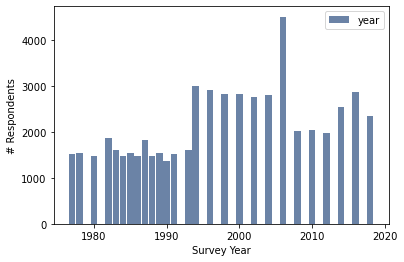

In [22]:
hist1 = thinkstats2.Hist(df.year, label='year')
thinkplot.Hist(hist1)
thinkplot.Config(xlabel='Survey Year', ylabel='# Respondents')

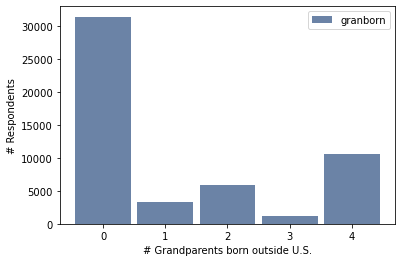

In [23]:
hist2 = thinkstats2.Hist(df.granborn, label='granborn')
thinkplot.Hist(hist2)
thinkplot.Config(xlabel='# Grandparents born outside U.S.', ylabel='# Respondents')

In [24]:
len(df[df.granborn == 0]), len(df[df.granborn > 0])

(31367, 20944)

In [25]:
granUS = df[df.granborn == 0]
granOut = df[df.granborn > 0]

granUS_hist = thinkstats2.Hist(granUS.rincome2, label='All US Grandparents')
granOut_hist = thinkstats2.Hist(granOut.rincome2, label='1 or more outside US')

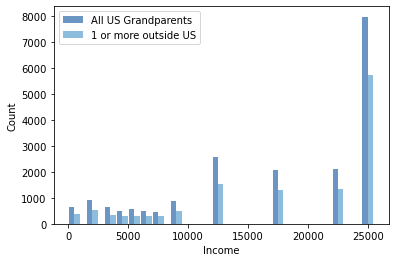

In [26]:
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(granUS_hist, align='right', width=width)
thinkplot.Hist(granOut_hist, align='left', width=width)
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

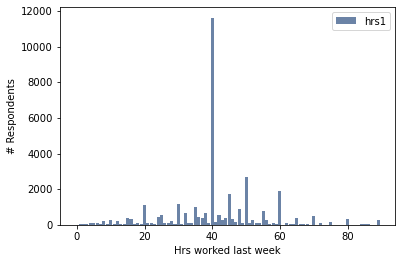

In [27]:
hist3 = thinkstats2.Hist(df.hrs1, label='hrs1')
thinkplot.Hist(hist3)
thinkplot.Config(xlabel='Hrs worked last week', ylabel='# Respondents')

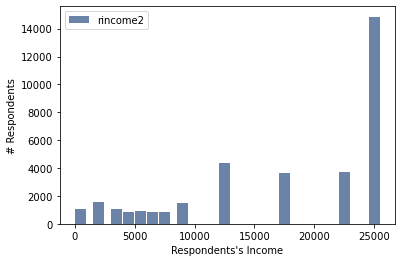

In [28]:
hist4 = thinkstats2.Hist(df.rincome2, label='rincome2')
thinkplot.Hist(hist4)
thinkplot.Config(xlabel="Respondents's Income", ylabel='# Respondents')

In [29]:
incMore20k = df[df.rincome2 >= 20000]
incLess20k = df[df.rincome2 <= 20000]

incMore_hist = thinkstats2.Hist(incMore20k.granborn, label='>$20k Income')
incLess_hist = thinkstats2.Hist(incLess20k.granborn, label='<$20k Income')

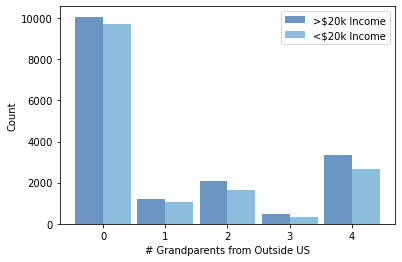

In [30]:
width = .45
thinkplot.PrePlot(2)
thinkplot.Hist(incMore_hist, align='right', width=width)
thinkplot.Hist(incLess_hist, align='left', width=width)
thinkplot.Config(xlabel='# Grandparents from Outside US', ylabel='Count')#, xlim=[0, 25000])

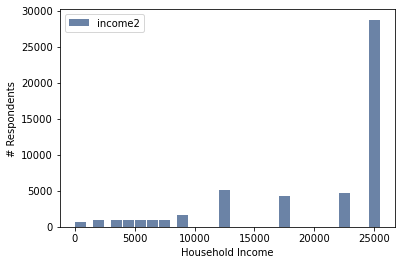

In [31]:
hist4b = thinkstats2.Hist(df.income2, label='income2')
thinkplot.Hist(hist4b)
thinkplot.Config(xlabel="Household Income", ylabel='# Respondents')

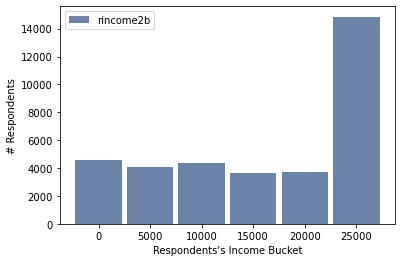

In [32]:
hist4c = thinkstats2.Hist(df.rincome2b, label='rincome2b')
thinkplot.Hist(hist4c)
thinkplot.Config(xlabel="Respondents's Income Bucket", ylabel='# Respondents')

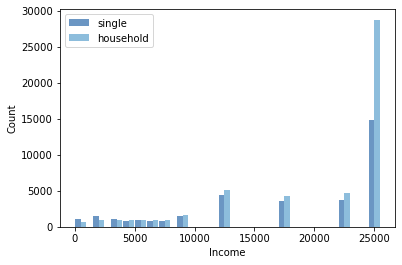

In [33]:
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(hist4, align='right', width=width, label="single")
thinkplot.Hist(hist4b, align='left', width=width, label="household")
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

In [34]:
df['rincome2'].count(), df['income2'].count()

(35241, 50934)

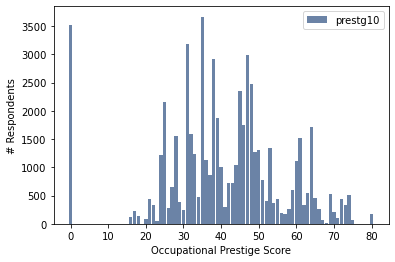

In [35]:
hist5 = thinkstats2.Hist(df.prestg10, label='prestg10')
thinkplot.Hist(hist5)
thinkplot.Config(xlabel='Occupational Prestige Score', ylabel='# Respondents')

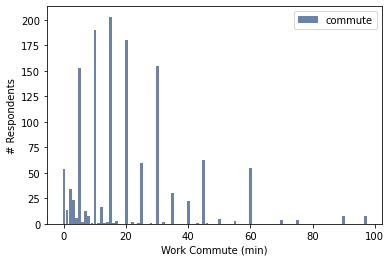

In [36]:
hist6 = thinkstats2.Hist(df.commute, label='commute')
thinkplot.Hist(hist6)
thinkplot.Config(xlabel='Work Commute (min)', ylabel='# Respondents')

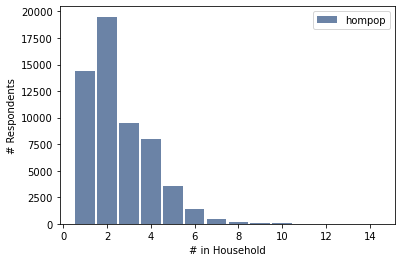

In [37]:
hist7 = thinkstats2.Hist(df.hompop, label='hompop')
thinkplot.Hist(hist7)
thinkplot.Config(xlabel='# in Household', ylabel='# Respondents')

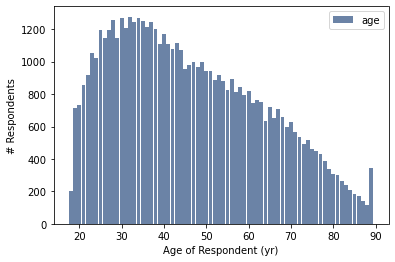

In [38]:
hist8 = thinkstats2.Hist(df.age, label='age')
thinkplot.Hist(hist8)
thinkplot.Config(xlabel='Age of Respondent (yr)', ylabel='# Respondents')

In [39]:
df.commute.median()

15.0

In [40]:
close = df[df.commute <= 15]
far = df[df.commute > 15]

close_hist = thinkstats2.Hist(close.rincome2, label='close')
far_hist = thinkstats2.Hist(far.rincome2, label='far')

In [42]:
# far_hist

Hist({25000.0: 116, 12500.0: 72, 17500.0: 51, 22500.0: 46, 9000.0: 17, 2000.0: 14, 7500.0: 13, 3500.0: 13, 4500.0: 12, 5500.0: 11, 500.0: 11, 6500.0: 6}, 'far')

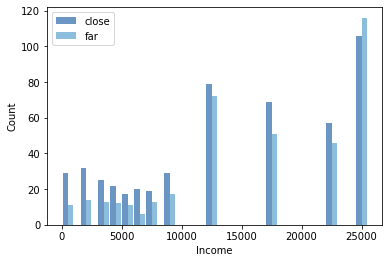

In [41]:
width = 450
thinkplot.PrePlot(2)
thinkplot.Hist(close_hist, align='right', width=width)
thinkplot.Hist(far_hist, align='left', width=width)
thinkplot.Config(xlabel='Income', ylabel='Count')#, xlim=[0, 25000])

In [42]:
incMore20k = df[df.rincome2 >= 20000]
incLess20k = df[df.rincome2 <= 20000]

incMore_pmf = thinkstats2.Pmf(incMore20k.granborn, label='>$20k Income')
incLess_pmf = thinkstats2.Pmf(incLess20k.granborn, label='<$20k Income')

(721, 609)

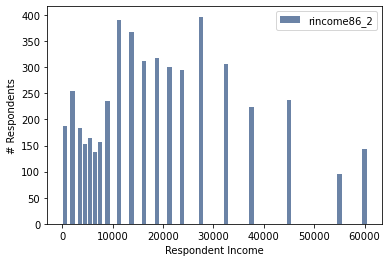

In [43]:
hist9 = thinkstats2.Hist(df.rincome86_2, label='rincome86_2')
thinkplot.Hist(hist9)
thinkplot.Config(xlabel='Respondent Income', ylabel='# Respondents')

In [45]:
df.rincome86_2.median()

16250.0

In [178]:
incMore16k = df[df.rincome86_2 > 16250]
incLess16k = df[df.rincome86_2 <= 16250]

incMore16_hist = thinkstats2.Hist(incMore20k.granborn, label='>$16k Income')
incLess16_hist = thinkstats2.Hist(incLess20k.granborn, label='<$16k Income')

In [179]:
len(incMore16k), len(incLess16k)

(2315, 2544)

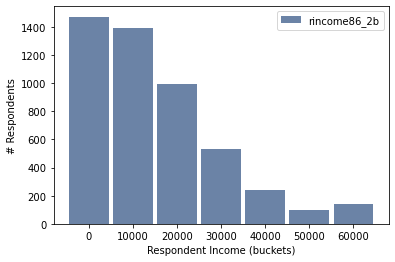

In [83]:
hist10 = thinkstats2.Hist(df.rincome86_2b, label='rincome86_2b')
thinkplot.Hist(hist10)
# plt.xticks(rotation=30)
thinkplot.Config(xlabel='Respondent Income (buckets)', ylabel='# Respondents')

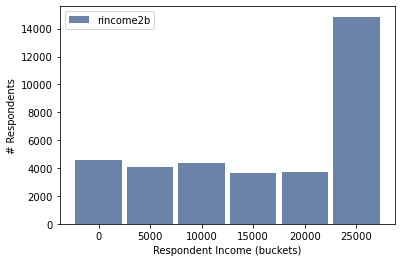

In [173]:
hist11 = thinkstats2.Hist(df.rincome2b, label='rincome2b')
thinkplot.Hist(hist11)
# plt.xticks(rotation=30)
thinkplot.Config(xlabel='Respondent Income (buckets)', ylabel='# Respondents')

## Variable Charcteristics

#### Mean, Mode, Spread, & Tails
Include the other descriptive characteristics about the variables: Mean, Mode, Spread,  and Tails (Chapter 2). 

In [104]:
df.head()

,year,rincome86,rincome,income,hompop,granborn,age,commute,hrs1,id,prestg10,uniqueID,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,1977,NaN,$7000 to 7999,$7000 to 7999,1.0,4.0,63.0,NaN,40.0,1,39,1977-1,7500.0,7500.0,NaN,5000.0,NaN
1,1977,NaN,$8000 to 9999,$10000 - 14999,2.0,4.0,31.0,NaN,15.0,2,32,1977-2,9000.0,12500.0,NaN,5000.0,NaN
2,1977,NaN,NaN,NaN,2.0,4.0,66.0,NaN,NaN,3,25,1977-3,NaN,NaN,NaN,NaN,NaN
3,1977,NaN,NaN,$20000 - 24999,2.0,2.0,26.0,NaN,NaN,4,39,1977-4,NaN,22500.0,NaN,NaN,NaN
4,1977,NaN,$7000 to 7999,NaN,9.0,1.0,20.0,NaN,40.0,5,40,1977-5,7500.0,NaN,NaN,5000.0,NaN


In [106]:
df.mode(numeric_only=True)[0:1]

,year,hompop,granborn,age,commute,hrs1,id,prestg10,rincome2,income2,rincome86_2,rincome2b,rincome86_2b
0,2006.0,2.0,0.0,32.0,15.0,40.0,1,35.0,25000.0,25000.0,27500.0,25000.0,0.0


In [107]:
df.mean()

year             1997.720712
hompop              2.558534
granborn            1.162834
age                46.289204
commute            20.245865
hrs1               41.455107
id               1196.870299
prestg10           40.498270
rincome2        17459.592520
income2         19784.898103
rincome86_2     19491.201893
rincome2b       16031.894668
rincome86_2b    14924.881663
dtype: float64

In [108]:
df.median()

year             1998.0
hompop              2.0
granborn            0.0
age                44.0
commute            15.0
hrs1               40.0
id               1060.0
prestg10           40.0
rincome2        22500.0
income2         25000.0
rincome86_2     16250.0
rincome2b       20000.0
rincome86_2b    10000.0
dtype: float64

In [171]:
def SummaryStats(var):
    minv = df[var].min()
    medv = df[var].median()
    maxv = df[var].max()
    meanv = round(df[var].mean(), 1)
    stdv = round(df[var].std(), 1)
    
    print("Variable:", var)
    print("\tMinimum:\t", minv)
    print("\tMedian:\t\t", medv)
    print("\tMaximum:\t", maxv)
    print("\tMean:\t\t", meanv)
    print("\tStd. Dev.\t", stdv)

In [177]:
statVars = ['year', 'hompop', 'granborn', 'age', 'hrs1', 'commute', 'prestg10', 'rincome2', 'income2', 'rincome86_2', 'rincome86_2b']

for item in statVars:
    SummaryStats(item)

Variable: year
	Minimum:	 1977
	Median:		 1998.0
	Maximum:	 2018
	Mean:		 1997.7
	Std. Dev.	 11.8
Variable: hompop
	Minimum:	 1.0
	Median:		 2.0
	Maximum:	 14.0
	Mean:		 2.6
	Std. Dev.	 1.4
Variable: granborn
	Minimum:	 0.0
	Median:		 0.0
	Maximum:	 4.0
	Mean:		 1.2
	Std. Dev.	 1.6
Variable: age
	Minimum:	 18.0
	Median:		 44.0
	Maximum:	 89.0
	Mean:		 46.3
	Std. Dev.	 17.5
Variable: hrs1
	Minimum:	 0.0
	Median:		 40.0
	Maximum:	 89.0
	Mean:		 41.5
	Std. Dev.	 14.3
Variable: commute
	Minimum:	 0.0
	Median:		 15.0
	Maximum:	 97.0
	Mean:		 20.2
	Std. Dev.	 17.1
Variable: prestg10
	Minimum:	 0
	Median:		 40.0
	Maximum:	 80
	Mean:		 40.5
	Std. Dev.	 16.3
Variable: rincome2
	Minimum:	 500.0
	Median:		 22500.0
	Maximum:	 25000.0
	Mean:		 17459.6
	Std. Dev.	 8426.3
Variable: income2
	Minimum:	 500.0
	Median:		 25000.0
	Maximum:	 25000.0
	Mean:		 19784.9
	Std. Dev.	 7449.8
Variable: rincome86_2
	Minimum:	 500.0
	Median:		 16250.0
	Maximum:	 60000.0
	Mean:		 19491.2
	Std. Dev.	 14629.7
Variable:

In [111]:
df.std()

year               11.790939
hompop              1.445464
granborn            1.609431
age                17.537180
commute            17.082472
hrs1               14.253505
id                852.797856
prestg10           16.316093
rincome2         8426.259155
income2          7449.806970
rincome86_2     14629.690814
rincome2b        9353.385261
rincome86_2b    14817.731510
dtype: float64

In [76]:
# df['year'].mean()
# # or:
# df.year.mean(), df.year.min(), df.year.max()

(1997.7207115895428, 1977, 2018)

In [ ]:
# mean = live.prglngth.mean()
# var = live.prglngth.var()
# std = live.prglngth.std()

# firsts.prglngth.mean(), others.prglngth.mean()

# firsts.prglngth.mean() - others.prglngth.mean()

In [ ]:
# # from pandas import DataFrame, read_csv
# # import matplotlib.pyplot as plt
# # import pandas as pd 

# # file = r'data/Presidents.xls'
# # df = pd.read_excel(file)

# # show data
# print('Min: ', df['Years in office'].min())
# print('Max: ', df['Years in office'].max())
# print('Sum: ', df['Years in office'].sum())

## PMF Comparison

#### Compare two scenarios in your data using a PMF
Using pg. 29 of your text as an example, compare two scenarios in your data using a  PMF. 

Reminder, this isn’t comparing two variables against each other – it is the same  variable, but a different scenario. Almost like a filter. 

The example in the book is first  babies compared to all other babies, it is still the same variable, but breaking the data  out based on criteria we are exploring (Chapter 3).

In [112]:
incMore20k = df[df.rincome2 >= 20000]
incLess20k = df[df.rincome2 <= 20000]

incMore_pmf = thinkstats2.Pmf(incMore20k.granborn, label='>$20k Income')
incLess_pmf = thinkstats2.Pmf(incLess20k.granborn, label='<$20k Income')

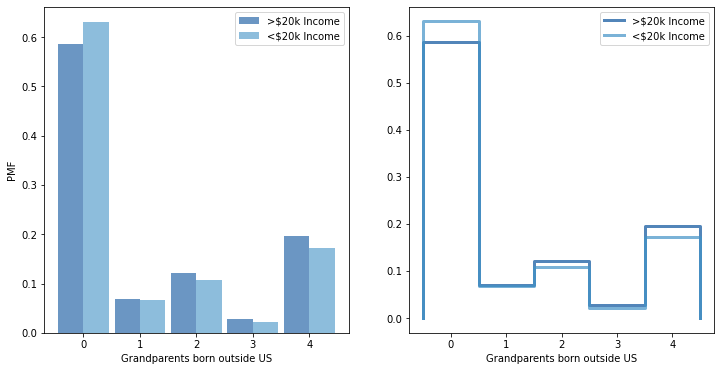

In [113]:
width=0.45
# axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(incMore_pmf, align='right', width=width)
thinkplot.Hist(incLess_pmf, align='left', width=width)
thinkplot.Config(xlabel='Grandparents born outside US', ylabel='PMF')#, axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([incMore_pmf, incLess_pmf])
thinkplot.Config(xlabel='Grandparents born outside US')#, axis=axis)

In [189]:
hi_prestg = df[df.prestg10 >= 40]
lo_prestg = df[df.prestg10 < 40]

hi_prestg_pmf = thinkstats2.Pmf(hi_prestg.granborn, label='High Occupational Prestige')
lo_prestg_pmf = thinkstats2.Pmf(lo_prestg.granborn, label='Low Occupational Prestige')

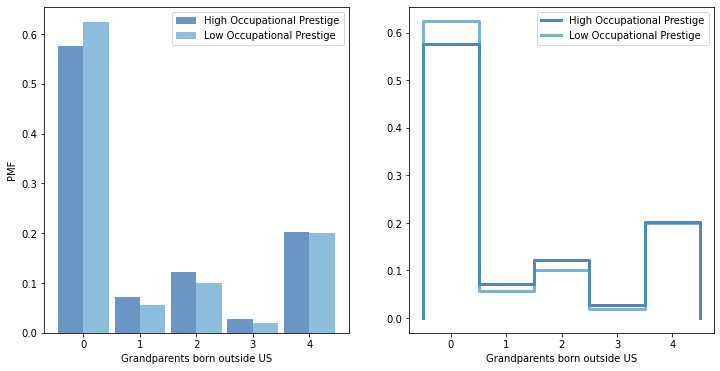

In [190]:
width=0.45
# axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(hi_prestg_pmf, align='right', width=width)
thinkplot.Hist(lo_prestg_pmf, align='left', width=width)
thinkplot.Config(xlabel='Grandparents born outside US', ylabel='PMF')#, axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([hi_prestg_pmf, lo_prestg_pmf])
thinkplot.Config(xlabel='Grandparents born outside US')#, axis=axis)

In [120]:
df.rincome86_2.median()

16250.0

In [118]:
incMore16k = df[df.rincome86_2 > 16250]
incLess16k = df[df.rincome86_2 <= 16250]

incMore16_pmf = thinkstats2.Pmf(incMore20k.granborn, label='> $16250 Income')
incLess16_pmf = thinkstats2.Pmf(incLess20k.granborn, label='<= $16250 Income')

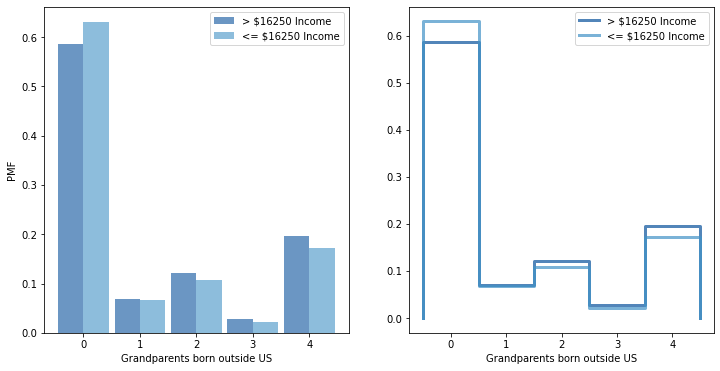

In [119]:
width=0.45
# axis = [27, 46, 0, 0.6]
thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(incMore16_pmf, align='right', width=width)
thinkplot.Hist(incLess16_pmf, align='left', width=width)
thinkplot.Config(xlabel='Grandparents born outside US', ylabel='PMF')#, axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([incMore16_pmf, incLess16_pmf])
thinkplot.Config(xlabel='Grandparents born outside US')#, axis=axis)

#### Create 1 CDF with one of your variables
Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this  tell you about your variable and how does it address the question you are trying to  answer (Chapter 4). 

In [158]:
def MakeCDF(var):
    cdf = thinkstats2.Cdf(df[var], label=var)
    thinkplot.Cdf(cdf)
    thinkplot.Show(xlabel=var, ylabel='CDF')

In [165]:
display(df.dtypes)

year              int64
rincome86        object
rincome          object
income           object
hompop          float64
granborn        float64
age             float64
commute         float64
hrs1            float64
id                int64
prestg10          int64
uniqueID         object
rincome2        float64
income2         float64
rincome86_2     float64
rincome2b       float64
rincome86_2b    float64
dtype: object

In [180]:
cdfVars = ['year', 'hompop', 'granborn', 'age', 'commute', 'hrs1', 'prestg10', 'rincome2', 'income2', 'rincome86_2', 'rincome86_2b']

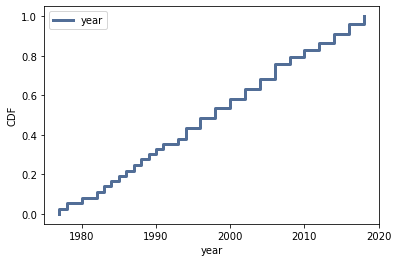

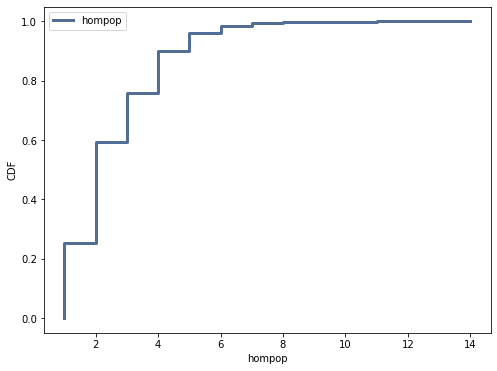

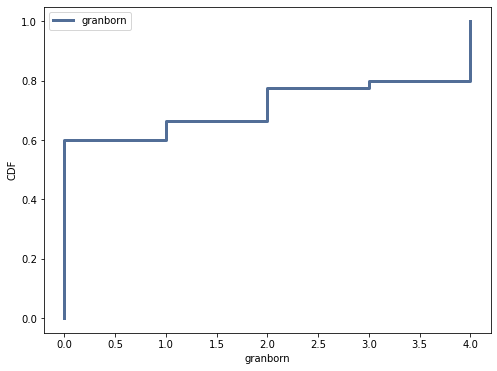

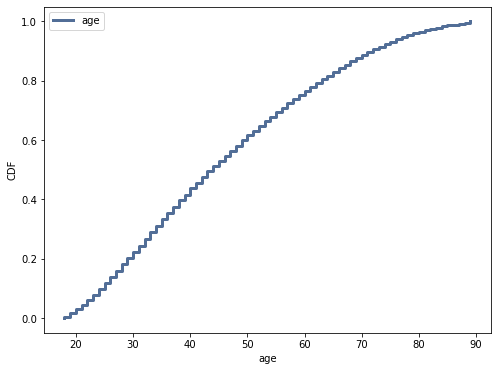

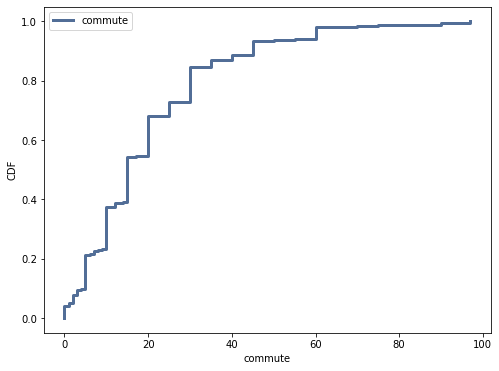

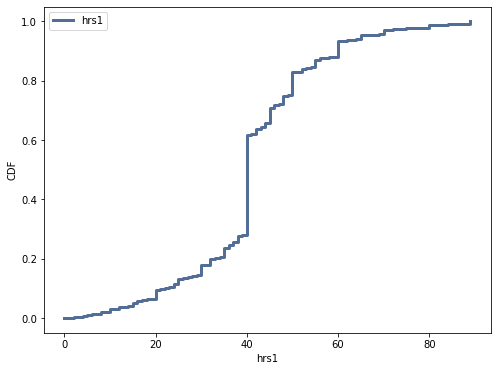

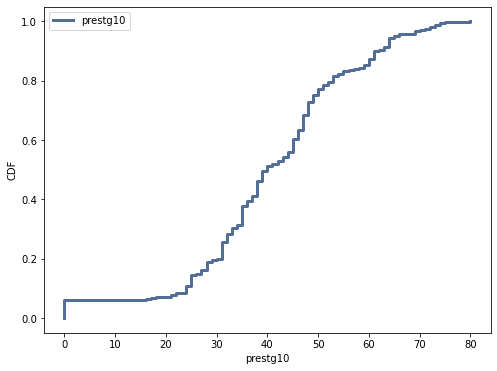

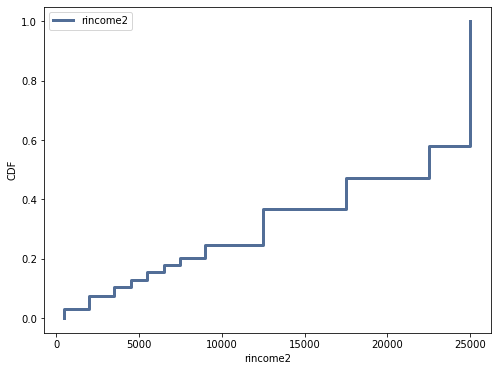

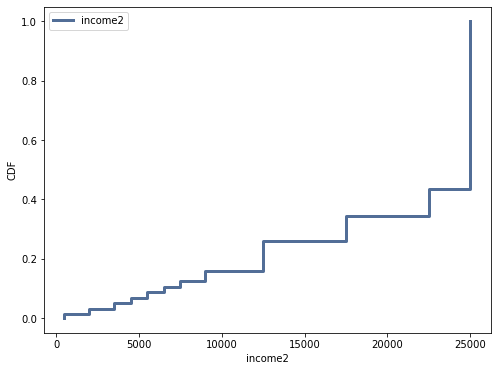

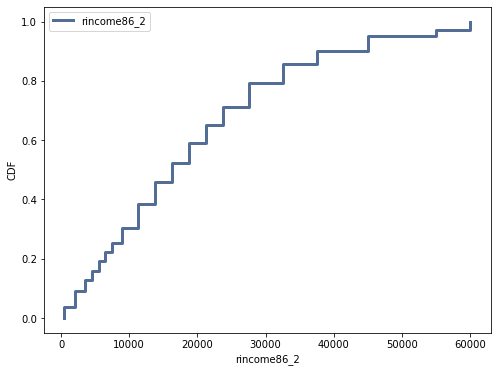

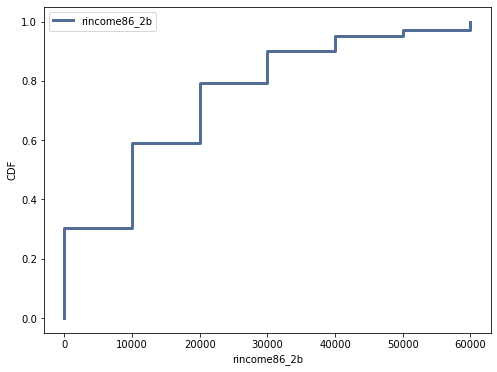

<Figure size 576x432 with 0 Axes>

In [181]:
for item in cdfVars:
    MakeCDF(item)

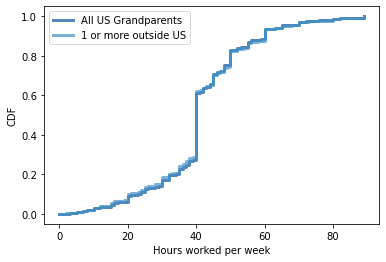

<Figure size 576x432 with 0 Axes>

In [167]:
granUS = df[df.granborn == 0]
granOut = df[df.granborn > 0]

granUS_cdf = thinkstats2.Cdf(granUS.hrs1, label='All US Grandparents')
granOut_cdf = thinkstats2.Cdf(granOut.hrs1, label='1 or more outside US')

thinkplot.PrePlot(2)
thinkplot.Cdfs([granUS_cdf, granOut_cdf])
thinkplot.Show(xlabel="Hours worked per week", ylabel="CDF")

#### Plot 1 analytical distribution
Plot 1 analytical distribution and provide your analysis on how it applies to the dataset  you have chosen (Chapter 5). 

In [192]:
def MakeCCDF(var):
    cdf = thinkstats2.Cdf(df[var], label=var)
    thinkplot.Cdf(cdf, complement=True)
    thinkplot.Show(xlabel=var, ylabel='CCDF',
                  yscale='log', loc='upper right')

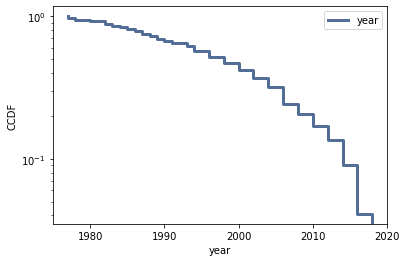

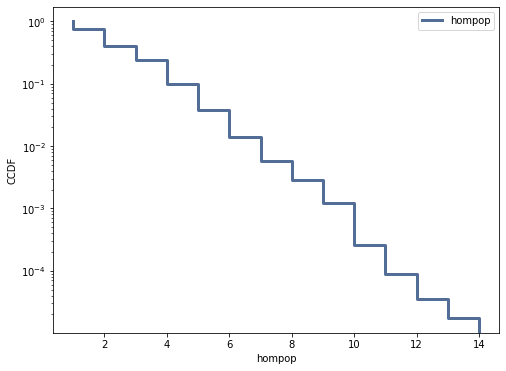

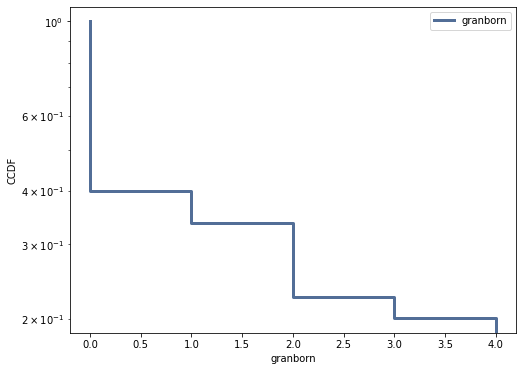

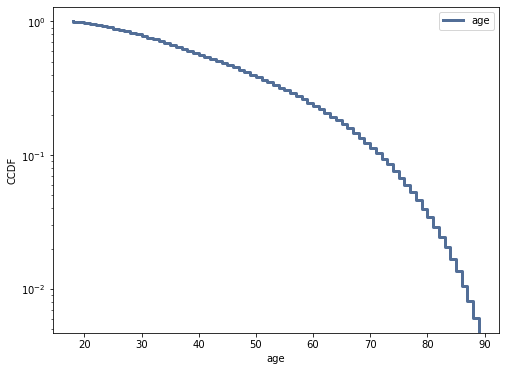

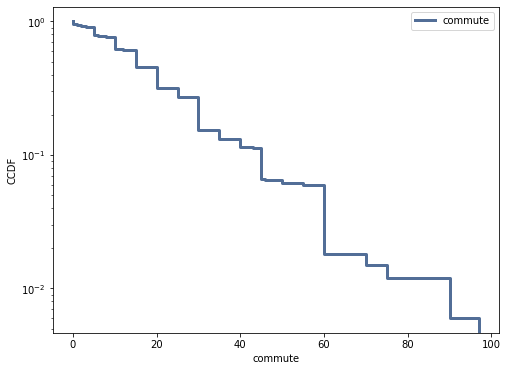

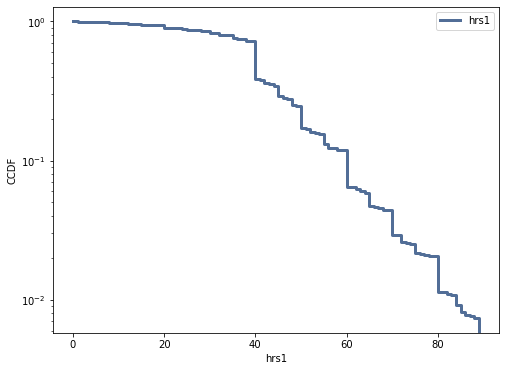

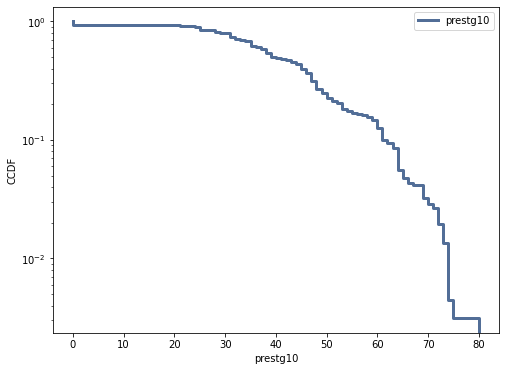

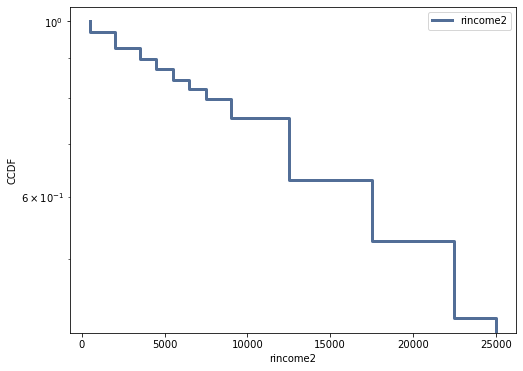

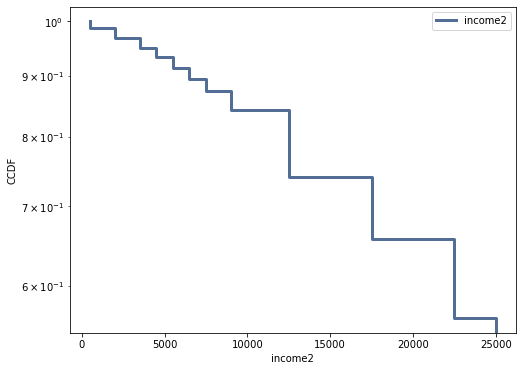

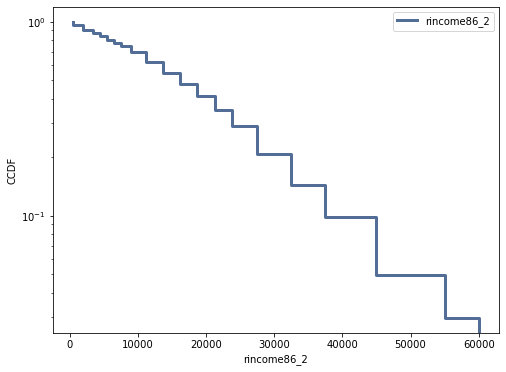

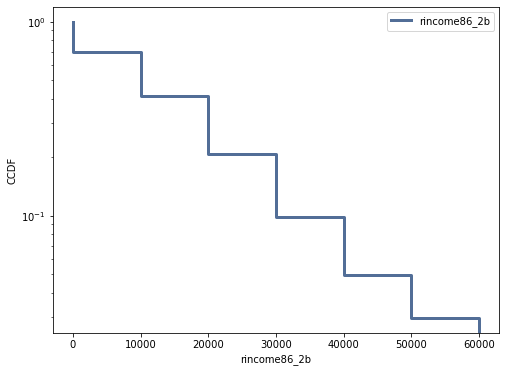

<Figure size 576x432 with 0 Axes>

In [193]:
for item in cdfVars:
    MakeCCDF(item)

Mean, Var 40.54900142653352 241.9623991455041
Sigma 15.555140601920128


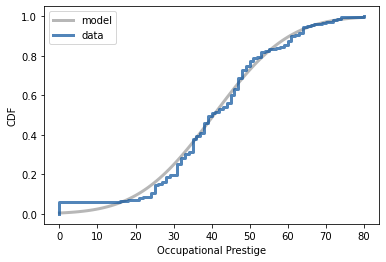

In [200]:
# estimate parameters: trimming outliers yields a better fit
mu, var = thinkstats2.TrimmedMeanVar(df['prestg10'], p=0.01)
print('Mean, Var', mu, var)
    
# plot the model
sigma = np.sqrt(var)
print('Sigma', sigma)
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=80)

thinkplot.Plot(xs, ps, label='model', color='0.6')

# plot the data
cdf = thinkstats2.Cdf(df['prestg10'], label='data')

thinkplot.PrePlot(1)
thinkplot.Cdf(cdf) 
thinkplot.Config(xlabel='Occupational Prestige',
                 ylabel='CDF')

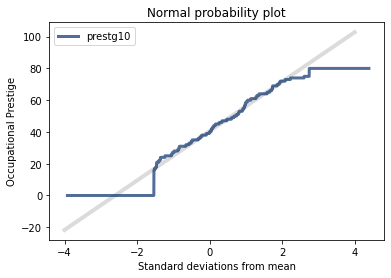

In [209]:
mean, var = thinkstats2.TrimmedMeanVar(df['prestg10'], p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(df['prestg10'])
thinkplot.Plot(xs, ys, label='prestg10')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Occupational Prestige')

#### Create two scatter plots
Create two scatter plots comparing two variables and provide your analysis on  correlation and causation. 

Remember, covariance, Pearson’s correlation, and Non Linear Relationships should also be considered during your analysis (Chapter 7). 

In [287]:
cleaned = df.dropna()

In [248]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

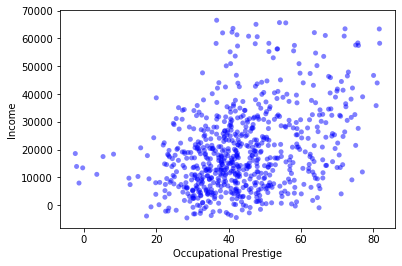

In [300]:
prestg10 = Jitter(cleaned.prestg10, 4)
rincome = Jitter(cleaned.rincome86_2, 4000)

thinkplot.Scatter(prestg10, rincome, alpha=.5, s=25)
thinkplot.Config(xlabel='Occupational Prestige',
                 ylabel='Income',
                 legend=False)

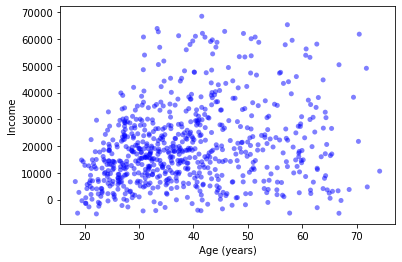

In [295]:
age = Jitter(cleaned.age, 0.5)
rincome = Jitter(cleaned.rincome86_2, 4000)

thinkplot.Scatter(age, rincome, alpha=.5, s=25)
thinkplot.Config(xlabel='Age (years)',
                 ylabel='Income',
                 legend=False)

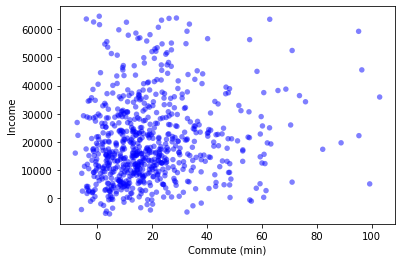

In [288]:
commute = Jitter(cleaned.commute, 4)
rincome = Jitter(cleaned.rincome86_2, 4000)

thinkplot.Scatter(commute, rincome, alpha=.5)
thinkplot.Config(xlabel='Commute (min)',
                 ylabel='Income',
                 legend=False)

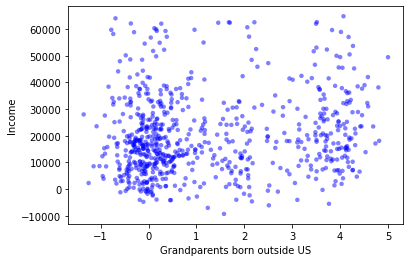

In [325]:
granborn = Jitter(cleaned.granborn, 0.4)
rincome = Jitter(cleaned.rincome86_2, 4000)

thinkplot.Scatter(granborn, rincome, alpha=.5, s=20)
thinkplot.Config(xlabel='Grandparents born outside US',
                 ylabel='Income',
                 legend=False)

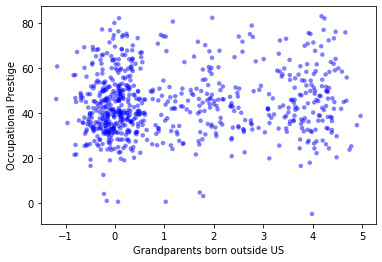

In [326]:
granborn = Jitter(cleaned.granborn, 0.4)
prestg10 = Jitter(cleaned.prestg10, 4)

thinkplot.Scatter(granborn, prestg10, alpha=.5, s=20)
thinkplot.Config(xlabel='Grandparents born outside US',
                 ylabel='Occupational Prestige',
                 legend=False)

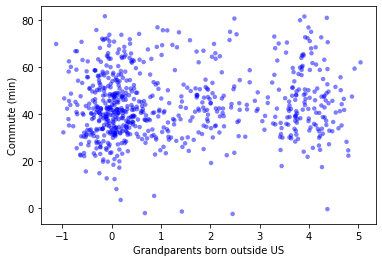

In [309]:
granborn = Jitter(cleaned.granborn, 0.4)
commute = Jitter(cleaned.commute, 4)

thinkplot.Scatter(granborn, prestg10, alpha=.5, s=20)
thinkplot.Config(xlabel='Grandparents born outside US',
                 ylabel='Commute (min)',
                 legend=False)

In [301]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [302]:
Cov(rincome, prestg10)

73456.18381073969

In [305]:
Cov(rincome, age)

38241.801203799725

In [307]:
Cov(rincome, commute)

32584.400043830698

In [303]:
Cov(granborn, rincome)

3688.579542431934

In [306]:
Cov(granborn, prestg10)

1.9395034919624288

In [310]:
Cov(granborn, commute)

1.2406949884052536

In [311]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [312]:
Corr(rincome, prestg10)

0.3560919890618445

In [315]:
Corr(rincome, age)

0.21528167433940118

In [316]:
Corr(rincome, commute)

0.11935043892063861

In [313]:
Corr(granborn, rincome)

0.1453662840945622

In [314]:
Corr(granborn, prestg10)

0.08104603880459373

In [317]:
Corr(granborn, commute)

0.0428963759501221

In [318]:
import pandas as pd

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [319]:
SpearmanCorr(rincome, prestg10)

0.32009658821425907

In [322]:
SpearmanCorr(rincome, age)

0.2241793489315234

In [323]:
SpearmanCorr(rincome, commute)

0.13059180445059013

In [320]:
SpearmanCorr(granborn, rincome)

0.10860711752115738

In [321]:
SpearmanCorr(granborn, prestg10)

0.075212464881199

In [324]:
SpearmanCorr(granborn, commute)

0.05824975070330691

#### Test Hypothesis
Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

#### Conduct Regression Analysis
For this project, conduct a regression analysis on either one dependent and one  explanatory variable, or multiple explanatory variables (Chapter 10 & 11). 